<a href="https://colab.research.google.com/github/BhardwajArjit/Research-Paper-Replication/blob/main/Causal_SETR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import math
import torch
import torchvision

from torch import nn
from torch.nn import init
import torch.nn.functional as F
from torchvision import transforms

In [ ]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data")
image_path = data_path / "cityscapes_data"

if image_path.is_dir():
  print(f"{image_path} directory already exists... skipping download")
else:
  print(f"{image_path} does not exist, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

with open(data_path / "cityscapes_data.zip", "wb") as f:
  request = requests.get("https://github.com/BhardwajArjit/Causality-Informed-Segmentation/raw/main/cityscapes_data.zip")
  print("Downloading nico subset data...")
  f.write(request.content)

with zipfile.ZipFile(data_path / "cityscapes_data.zip", "r") as zip_ref:
  print(f"Uzipping nico subset data...")
  zip_ref.extractall(data_path)

data/cityscapes_data does not exist, creating one...
Uzipping nico subset data...


In [3]:
import os

def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [4]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/cityscapes_data'.
There are 0 directories and 500 images in 'data/cityscapes_data/val'.
There are 0 directories and 2975 images in 'data/cityscapes_data/train'.


In [5]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/cityscapes_data/train'),
 PosixPath('data/cityscapes_data/test'))

Random image path: data/cityscapes_data/train/2329.jpg
Image class: train
Image height: 256
Image width: 512


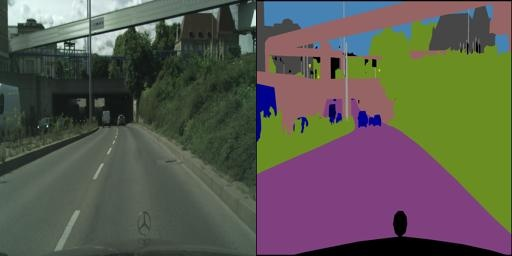

In [6]:
import random
from PIL import Image

# Set seed
# random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("train/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img